# Analise de comentários de apps

In [3]:
import pandas as pd
from textblob import TextBlob

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('com.bradesco.csv')

In [5]:
df.head()

,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias
0,gp:AOqpTOEpvpo3L_QF3hXxSb6m-vQ7YDfKhCNcT7a7hKa...,Sergio Apolina,https://lh3.googleusercontent.com/-jEINH82rxgU...,2020-03-02T16:37:29.478Z,5,5,https://play.google.com/store/apps/details?id=...,NaN,Muito bom mesmo Bommm mesmo tudo de bom também...,NaN,NaN,3.11.6,0,"[{""criteria"":""vaf_phase1_international_transfe..."
1,gp:AOqpTOEONc_NUeDb6uXow3BOs8ITRxxs5wnf2RmR95g...,Leonardo Castro,https://lh3.googleusercontent.com/a-/AOh14Gi9b...,2020-03-02T15:51:38.394Z,4,4,https://play.google.com/store/apps/details?id=...,NaN,Falta a opção de digitar o código do boleto di...,NaN,NaN,3.11.6,0,"[{""criteria"":""vaf_phase1_auto_insurance"",""rati..."
2,gp:AOqpTOFp2lXdnWodviTy-Ghv3Eccg1A-6LYccBU1Zaj...,Alexsandro Martins de Paiva,https://lh3.googleusercontent.com/a-/AOh14GjOA...,2020-03-02T09:48:45.600Z,1,1,https://play.google.com/store/apps/details?id=...,NaN,Im very disappointed. I was expecting much mor...,2019-08-23T20:46:55.663Z,"Oi! O que está acontecendo? Por favor, envie m...",3.11.6,1,"[{""criteria"":""vaf_see_multiple_accounts"",""rati..."
3,gp:AOqpTOHexCenyGqr4YMQP3ZhH6wNOBty6h7o3RgH4vZ...,Milena Farias,https://lh3.googleusercontent.com/-QSbKzq1U2VQ...,2020-03-01T23:39:34.541Z,5,5,https://play.google.com/store/apps/details?id=...,NaN,Muito bom,NaN,NaN,3.11.6,0,"[{""criteria"":""vaf_tracking_finances"",""rating"":..."
4,gp:AOqpTOHrr6L6G3jxkN35796wRmHh6KeX5xm7oQTPmjL...,Unk,https://lh3.googleusercontent.com/a-/AOh14Gimv...,2020-02-29T23:52:12.514Z,1,1,https://play.google.com/store/apps/details?id=...,NaN,Um dia piores apps bancários,NaN,NaN,3.11.6,0,"[{""criteria"":""vaf_phase1_home_insurance"",""rati..."


In [6]:
df['date'] = pd.to_datetime(df.date).dt.date # pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce').apply(lambda x: x.replace(hour = 0, minute=0, second=0))

In [7]:
%%time
df['text_en'] = ''
df['text_polarity'] = 0.0
df['text_subjectivity'] = 0.0

for index, row in df.iterrows():
    if len(row['text']) > 3:
        phrase = TextBlob(row['text']) 
        if phrase.detect_language() != 'en':
            phrase = TextBlob(str(phrase.translate(to='en')))

        df.at[index,'text_en'] = phrase
        df.at[index,'text_polarity'] = phrase.polarity
        df.at[index,'text_subjectivity'] = phrase.subjectivity

HTTPError: HTTP Error 429: Too Many Requests

In [16]:
df = df[df['text_en'] != '']

Text(0, 0.5, 'Subjectivity')

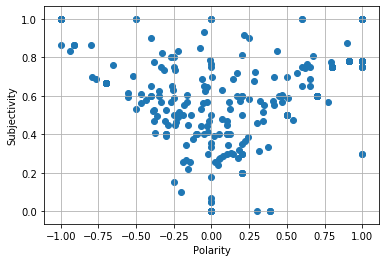

In [17]:
plt.scatter(df.text_polarity, df.text_subjectivity)
plt.grid(True, which='both')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

Wall time: 778 ms


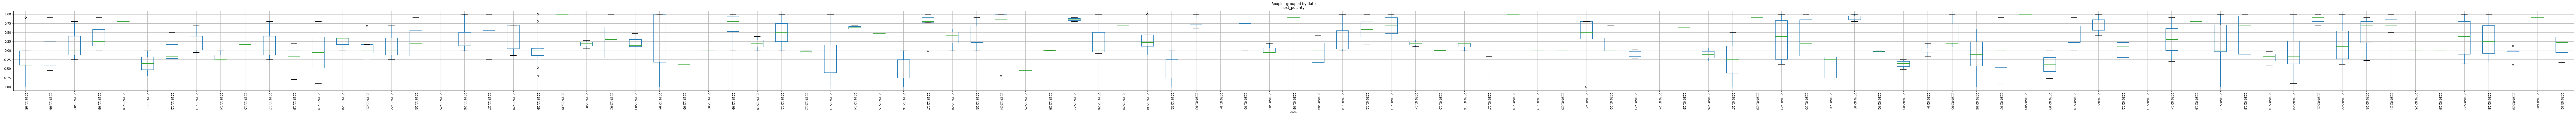

In [18]:
%%time
fig, ax = plt.subplots(figsize=(150,5))
#plt.suptitle('') 
df.boxplot(column=['text_polarity'], by='date', ax=ax, rot=-90)

Wall time: 790 ms


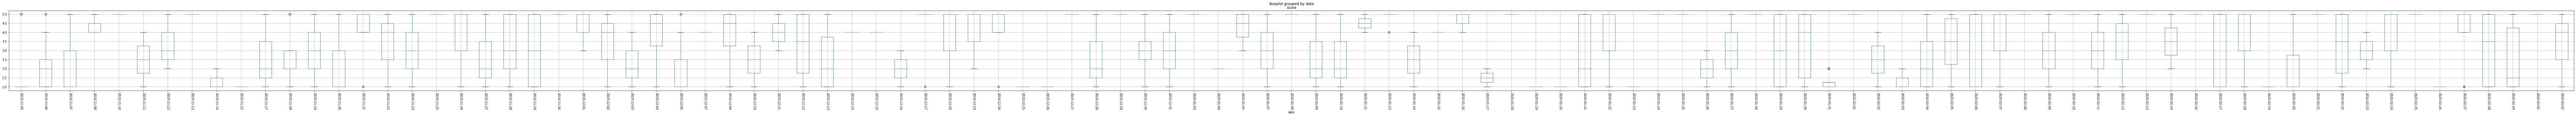

In [19]:
%%time
fig, ax = plt.subplots(figsize=(150,5))
#plt.suptitle('') 
df.boxplot(column=['score'], by='date', ax=ax, rot=-90)

Wall time: 30.9 ms


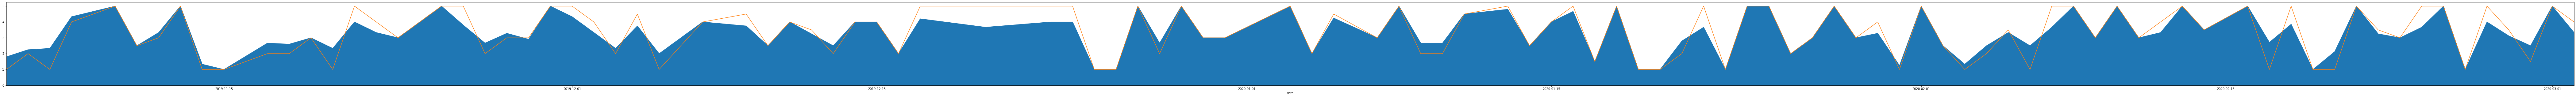

In [20]:
%%time
fig, ax = plt.subplots(figsize=(150,5))
df.groupby('date').score.mean().plot(kind='area', ax=ax)
df.groupby('date').score.median().plot(kind='line', ax=ax)

In [21]:
scaler = MinMaxScaler()
df['text_polarity_normalized'] = scaler.fit_transform(df[['text_polarity']])
df['score_normalized'] = scaler.fit_transform(df[['score']])

C:\Users\suzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\suzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


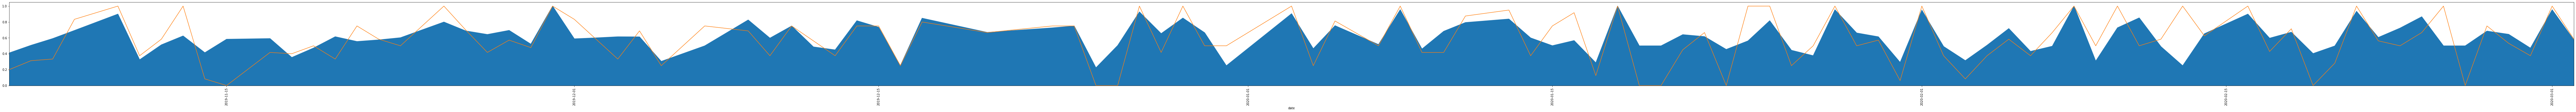

In [22]:
fig, ax = plt.subplots(figsize=(150,5))
df.groupby('date').text_polarity_normalized.mean().plot(kind='area', ax=ax, rot=90)
df.groupby('date').score_normalized.mean().plot(kind='line', ax=ax, rot=90)

In [23]:
df[['score', 'text_polarity']].corr()

,score,text_polarity
score,1.00000,0.75429
text_polarity,0.75429,1.00000


In [24]:
df['year_month'] = df['date'].map(lambda x: str(x.year) + '-' + str(x.month).zfill(2))

C:\Users\suzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Wall time: 225 ms


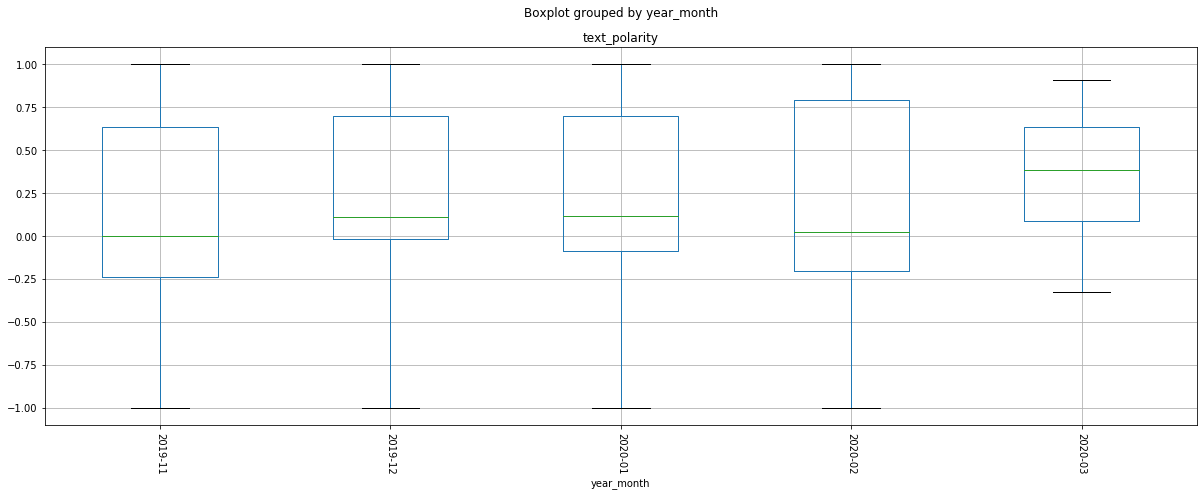

In [25]:
%%time
fig, ax = plt.subplots(figsize=(20,7))
df.boxplot(column=['text_polarity'], by='year_month', ax=ax, rot=-90)

Wall time: 49.9 ms


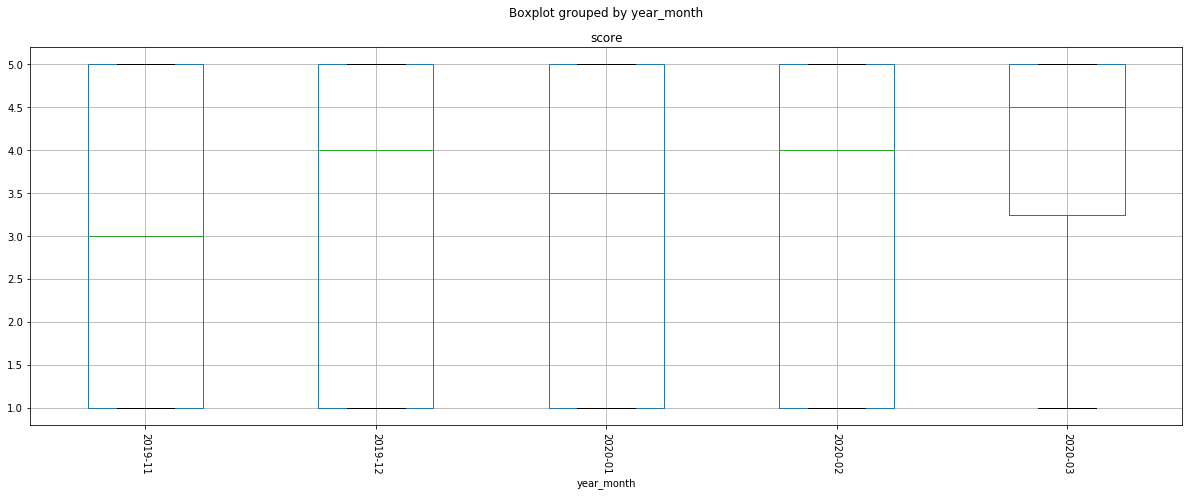

In [26]:
%%time
fig, ax = plt.subplots(figsize=(20,7))
#plt.suptitle('') 
df.boxplot(column=['score'], by='year_month', ax=ax, rot=-90)